# Biodiversity in National Parks

## Structure
- 1. Introduction
- 2. Data Characteristics and Cleaning
- 3. Analysis
    - 3.1. What is the distribution of conservation status for each category?
    - 3.2. Are certain types of species more likely to be endangered?
    - 3.3. Are the differences between species and their conservation status significant?
    - 3.4. Which species were spotted the most at each park?
- 4. Conclusions

## 1. Introduction
The aim of this project is to analyse data from the National Parks Service about endangered species in different parks, and identify any patterns or themes in relation to the conservation statuses of these species.

Below are the questions that this analysis will seek to answer:
- What is the distribution of conservation status for species?
- Which species are more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park, and what was their distribution?

## 2. Data Characteristics and Cleaning

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

The `species_info.csv` dataset has the following columns of data:
- category - class of animal
- scientific_name - the scientific name of each species
- common_name - the common names of each species
- conservation_status - each species’ current conservation status

In [2]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


The `observations.csv` dataset had the following columns of data:
- scientific_name - the scientific name of each species
- park_name - Park where species were found
- observations - the number of times each species was observed at park

In [5]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Next, I am using .shape and .info() to gain a better understanding of the characteristics of each dataset. 

Some characteristics to note here are:
- In both `species` and `observations`, there are variables that are objects that should be strings. I amend this in the next section.
- In `species`, there are 5,824 entries, but `conservation_status` has 191 non-null counts. This is something to look into.

I have checked for and removed any duplicated values in each DataFrame. 

In [7]:
print(f"species shape: {species.shape}")
print(species.info())

print(f"observations shape: {observations.shape}")
print(observations.info())

species shape: (5824, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
observations shape: (23296, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [9]:
# Amending data types from 'object' to 'string'
species = species.astype('string')
observations['scientific_name'] = observations['scientific_name'].astype('string')
observations['park_name'] = observations['park_name'].astype('string')

# Checing for duplicated values in each DataFrame
print(f"Duplicated valaues in Species:\n {species.duplicated().value_counts()}")
print(f"Duplicated valaues in Observations:\n {observations.duplicated().value_counts()}")

#Dropping duplicated values from 'observations' and verifying by checking again
observations = observations.drop_duplicates()
print(f"Duplicated valaues in Observations:\n {observations.duplicated().value_counts()}")

Duplicated valaues in Species:
 False    5824
Name: count, dtype: int64
Duplicated valaues in Observations:
 False    23281
True        15
Name: count, dtype: int64
Duplicated valaues in Observations:
 False    23281
Name: count, dtype: int64


Starting with `species` I wanted to find out how many unique species are in the dataset. By examining the `scientific_name` column, I found that there are 5,541 unique species in the `species` DataFrame, even though there are 5,824 total entries. This indicates that some scientific names appear more than once.

I also observed that some species have multiple common names. These are stored in the `common_names` column, but not all common names are recorded for every scientific name. As a result, some species appear multiple times, each with different common names, while others may be missing some or all of their common names.

To simplify `species`, I will remove `common_names` and use `scientific_name` as the unique identifier for each species. This ensures consistency, as `scientific_name` is more standardised and avoids the inconsistencies and duplicates introduced by varying common names.

In [11]:
print(f"number of species: {species.scientific_name.nunique()}")

# Checking for any multiple entries of each 'scientific_name'
counts = species.groupby('scientific_name').size().loc[lambda x: x > 1]
print(counts)

#Filtering species to look more closely at the values for a specific 'scientific_name'
check_1 = species[species['scientific_name'] == 'Agrostis mertensii']
print(check_1)

check_2 = species[species['scientific_name'] == 'Vulpia myuros']
print(check_2)

#Removing 'common_names' to simplify `species`, and removing duplicates from the resulting DataFrame
species = species.drop(['common_names'], axis=1)
print(f"Duplicated valaues in Species:\n {species.duplicated().value_counts()}")
species = species.drop_duplicates()
print(f"Duplicated valaues in Species:\n {species.duplicated().value_counts()}")

number of species: 5541
scientific_name
Agrostis capillaris     2
Agrostis gigantea       2
Agrostis mertensii      2
Agrostis scabra         2
Agrostis stolonifera    2
                       ..
Vireo solitarius        2
Vulpia bromoides        2
Vulpia myuros           2
Vulpia octoflora        2
Zizia aptera            2
Length: 274, dtype: int64
            category     scientific_name  \
2136  Vascular Plant  Agrostis mertensii   
4178  Vascular Plant  Agrostis mertensii   

                              common_names conservation_status  
2136                     Northern Agrostis                <NA>  
4178  Arctic Bentgrass, Northern Bentgrass                <NA>  
            category scientific_name  \
2330  Vascular Plant   Vulpia myuros   
5643  Vascular Plant   Vulpia myuros   

                                           common_names conservation_status  
2330                                     Rattail Fescue                <NA>  
5643  Foxtail Fescue, Rattail Fescue, Rat-T

In the previous stage, I identified that there are null values in `conservation_status`. To take a closer look, I have grouped the data. Given that the majority of the dataset has been assigned `nan` as a `conservation_status` I have assumed that there are no concerns about these species. To make this clear, I have replaced the `nan` values with `No Intervention`.

In [13]:
# Looking at null values in the 'conservation_status' column
print(f"Null values: {species.conservation_status.isna().sum()}")
print(f"Not null values: {species.conservation_status.notnull().sum()}")
species.groupby("conservation_status").size()

Null values: 5363
Not null values: 180


conservation_status
Endangered             15
In Recovery             4
Species of Concern    151
Threatened             10
dtype: int64

In [15]:
# Replacing null values in 'conservation_status' with 'No Intervention'
species.fillna('No Intervention', inplace=True)
print(f"Null values: {species.conservation_status.isna().sum()}")
print(f"Not null values: {species.conservation_status.notnull().sum()}")
species.groupby("conservation_status").size()

Null values: 0
Not null values: 5543


conservation_status
Endangered              15
In Recovery              4
No Intervention       5363
Species of Concern     151
Threatened              10
dtype: int64

There is still a discrepancy between the number of unique scientific names (5,541) and the total entries (5,543) in `species` suggesting that there are two duplicates that I have missed. I carried out the checks again and identified two pairs of entries that shared the same scientific name but had different conservation statuses. For this analysis, I have assumed the worst and opted for the entry with the most concerning conservation status.

In [17]:
# Checking for duplicate entries
print(f"number of species: {species.scientific_name.nunique()}")
print(species.info())
counts = species.groupby('scientific_name').size().loc[lambda x: x > 1]
print(counts)

# Looking at the duplicate entries in further detail
check_3 = species[species['scientific_name'] == 'Canis lupus']
print(check_3)

check_4 = species[species['scientific_name'] == 'Oncorhynchus mykiss']
print(check_4)

number of species: 5541
<class 'pandas.core.frame.DataFrame'>
Index: 5543 entries, 0 to 5823
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5543 non-null   string
 1   scientific_name      5543 non-null   string
 2   conservation_status  5543 non-null   string
dtypes: string(3)
memory usage: 173.2 KB
None
scientific_name
Canis lupus            2
Oncorhynchus mykiss    2
dtype: int64
     category scientific_name conservation_status
8      Mammal     Canis lupus          Endangered
3020   Mammal     Canis lupus         In Recovery
     category      scientific_name conservation_status
560      Fish  Oncorhynchus mykiss     No Intervention
3283     Fish  Oncorhynchus mykiss          Threatened


In [19]:
# Removing the entries with the least concerning 'conservation_status'
species.drop(species[(species['category'] == 'Mammal') & (species['scientific_name'] == 'Canis lupus') & (species['conservation_status'] == 'In Recovery')].index, inplace=True)
species.drop(species[(species['category'] == 'Fish') & (species['scientific_name'] == 'Oncorhynchus mykiss') & (species['conservation_status'] == 'No Intervention')].index, inplace=True)

# Conducting a final check on the number of unique species using 'scientific_name' and the number of entries in 'species' 
print(f"number of species: {species.scientific_name.nunique()}")
print(species.info())

number of species: 5541
<class 'pandas.core.frame.DataFrame'>
Index: 5541 entries, 0 to 5823
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   string
 1   scientific_name      5541 non-null   string
 2   conservation_status  5541 non-null   string
dtypes: string(3)
memory usage: 173.2 KB
None


Next, I want to understand the different types of species in the dataset. I can do this using the `category` column. There are 7 categories in `species`, including different categories of animals and plants. Taking a closer look, I have grouped the `category` column by size in order to see how many species there are for each type. In this dataset, the Vascular Plant category has the most amount of species (4,262), whilst the Reptile category has the fewest (79).

In [21]:
# Looking at the different species categories and the total number of entries per category
print(f"Categories: {species.category.unique()}")
species.groupby("category").size()

Categories: <StringArray>
[           'Mammal',              'Bird',           'Reptile',
         'Amphibian',              'Fish',    'Vascular Plant',
 'Nonvascular Plant']
Length: 7, dtype: string


category
Amphibian              79
Bird                  488
Fish                  125
Mammal                176
Nonvascular Plant     333
Reptile                78
Vascular Plant       4262
dtype: int64

I will now look at `observations`. I have identified 4 National Parks in the `observations` dataset, and the total amount of observations is 3,312,429.

In [23]:
print(f"National Parks: {observations.park_name.unique()}")
print(f"Total number of observations: {observations.observations.sum()}")

National Parks: <StringArray>
['Great Smoky Mountains National Park',              'Yosemite National Park',
                 'Bryce National Park',           'Yellowstone National Park']
Length: 4, dtype: string
Total number of observations: 3312429


In [25]:
print(observations.head())
print(species.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name conservation_status
0   Mammal  Clethrionomys gapperi gapperi     No Intervention
1   Mammal                      Bos bison     No Intervention
2   Mammal                     Bos taurus     No Intervention
3   Mammal                     Ovis aries     No Intervention
4   Mammal                 Cervus elaphus     No Intervention


Now that I have cleaned `species` and `observations` I have merged the DataFrames to create `all_data`, which I will use in the analysis section.

In [27]:
# Merging 'observations' and 'species' using a left join
all_data = observations.merge(species, how='left', on='scientific_name')

# Checking that info and first 5 rows of 'all_data' are as expected
print(all_data.info())
print(all_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23281 entries, 0 to 23280
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      23281 non-null  string
 1   park_name            23281 non-null  string
 2   observations         23281 non-null  int64 
 3   category             23281 non-null  string
 4   conservation_status  23281 non-null  string
dtypes: int64(1), string(4)
memory usage: 909.5 KB
None
            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category conservation_status  
0            68  Vascular Plan

## 3. Analysis

In this section I will use `species` and `all_data` in order to answer the questions I laid out in the introduction.

#### 3.1. What is the distribution of conservation status for each category?

To begin my analysis of `conservation_status` I have filtered `species` to exclude any entries that have a `No Intervention` status, since I want to focus on species that are under some level of threat.

Below is a chart and pivot table that look into the `category` split amongst each `conservation_status`. `Species of Concern` is the most populated conservation status, with the `Bird` category having the most amount of entries under this status (68), followed by `Vascular Plant` (43) and `Mammal` (22). Amongst the `Endangered` category, `Mammal` has the most entries, followed by `Bird` and `Fish`. The categroies `Nonvascular` and `Reptiles` have very low counts across all statuses. 

,conservation_status,scientific_name,percentage
0,Species of Concern,151,84.0
1,Endangered,15,8.0
2,Threatened,10,6.0
3,In Recovery,3,2.0


<Figure size 640x480 with 0 Axes>

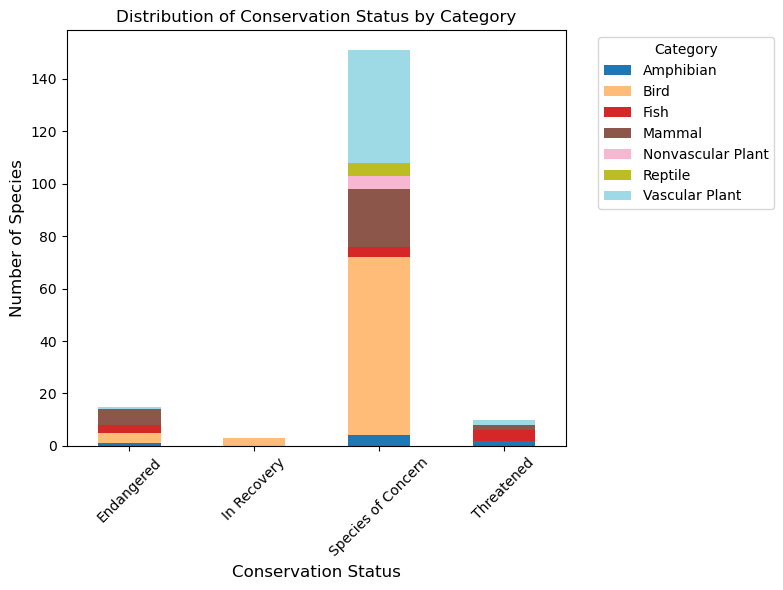

category,conservation_status,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
0,Endangered,1.0,4.0,3.0,6.0,0.0,0.0,1.0
1,In Recovery,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2,Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
3,Threatened,2.0,0.0,4.0,2.0,0.0,0.0,2.0


In [386]:
# Filtering `species` to remove entries with `No Intervention`
conservation_data = species[species['conservation_status'] != 'No Intervention']

# Looking at the % split for each 'conservation_status'
conservations_counts = conservation_data.groupby('conservation_status').scientific_name.nunique().reset_index()
conservations_counts['percentage'] = round(conservations_counts.scientific_name / conservations_counts.scientific_name.sum() * 100)
conservations_counts = conservations_counts.sort_values(by='percentage', ascending=False).reset_index(drop=True)
display(conservations_counts)

# Counting the number of occurrences of each 'conservation_status' and 'category' combination
counts = conservation_data.groupby(['conservation_status', 'category']).size().unstack(fill_value=0)

# Using 'counts' to create stacked bar chart
counts.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20')
plt.title('Distribution of Conservation Status by Category')
plt.ylabel('Number of Species', size=12)
plt.xlabel('Conservation Status', size=12)
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.clf()

# Supporting pivot table for 'conservation_status' and 'category'
pivot_table = conservation_data.pivot_table(columns='category', index='conservation_status', values='scientific_name', aggfunc='count').fillna(0).reset_index()
display(pivot_table)

#### 3.2. Are certain types of species more likely to be endangered?

The next questions asks whether certain types of species are more likely to be endangered. To answer this, I have added a new column `is_protected` which will report `True` for any species with a `conservation_status` different to `No Intervention`.

In [112]:
species['is_protected'] = species.conservation_status != 'No Intervention'

In order to see which species are more likely to be endangered, I have grouped the data by `category` and `is_protected` to show the quantity of species per category group that is and isn't protected.

In [117]:
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected', index='category', values='scientific_name').reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,114,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Whilst this summary is useful, it would be better to convert the values into percentages in order to clearly see which category has the highest proportion of protected species. Below I have added the column `percentage_protected` to the summary table. The `Mammal` category has the highest percentage of protected species at 17%, closely followed by `Bird` at 15%.

In [128]:
category_counts['percentage_protected'] = round(category_counts.protected/(category_counts.not_protected + category_counts.protected) * 100)
category_counts = category_counts.sort_values(by='percentage_protected', ascending=False).reset_index(drop=True)
category_counts

,category,not_protected,protected,percentage_protected
0,Mammal,146,30,17.0
1,Bird,413,75,15.0
2,Amphibian,72,7,9.0
3,Fish,114,11,9.0
4,Reptile,73,5,6.0
5,Nonvascular Plant,328,5,2.0
6,Vascular Plant,4216,46,1.0


#### 3.3. Are the differences between species and their conservation status significant?

In this section I will conduct chi-squared tests to determine whether different species have statistically significant differences in conservation statuses. In order to do so, I will create contingency tables like the below, which will enable me to determine the p-value. 

|    category     | protected | not protected |
|-----------------|-----------|---------------|
| **e.g. Mammal** | ?         | ?             |
| **e.g. Bird**   | ?         | ?             |


Firstly, I have created `contingency_1` which is observing the categories `Mammal` and `Bird`. The result of the chi-squared test is a p-value of 0.69. This is much greater than the significance threshold of 0.05, therefore the observed difference in conservation status between birds and mammals is not statistically significant, meaning that birds aren't more or less likely to be protected than mammals.

In [134]:
contingency_1 = np.array([[30, 146], [75, 413]])

from scipy.stats import chi2_contingency 

chi2, pval, dof, expected = chi2_contingency(contingency_1)

print(f"P-value: {pval}")

P-value: 0.6875948096661336


Next, I have created `contingency_2` to test the difference between `Mammal` and `Reptile`. The result of the chi-squared test is a p-value of 0.038. This is less than the significance threshold of 0.05, therefore there is likely a real difference in conservation status between mammals and reptiles.

In [149]:
contingency_2 = np.array([[30, 146], [5, 73]])

chi2, pval, dof, expected = chi2_contingency(contingency_2)

print(f"P-value: {pval}")

P-value: 0.03835559022969898


Finally, I have created `contingency_3` to test the difference between `Nonvascular Plant` and `Vascular Plant`. The result of the chi-squared test is a p-value of 0.66. Similarly to `contingency_1`, this is greater than the significance threshold of 0.05, therefore the observed difference in conservation status between nonvascaular and vascular plants is not statistically significant.

In [144]:
contingency_3 = np.array([[5, 328], [46, 4216]])

chi2, pval, dof, expected = chi2_contingency(contingency_3)

print(f"P-value: {pval}")

P-value: 0.6623419491381985


#### 3.4. Which species were spotted the most at each park?

The final question seeks to understand the number of observations by park.

Below is a chart that displays the total number of observations by park. This is supported by the summary table below. `Yellowstone` has the most observations (over 1.4 million), and Great Smokey Mountains has the least (just over 431k). 

<Figure size 640x480 with 0 Axes>

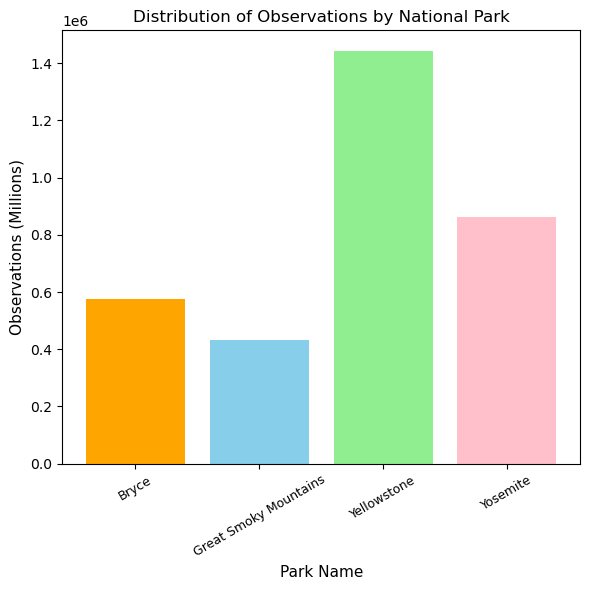

,park_name,observations
0,Bryce National Park,575901
1,Great Smoky Mountains National Park,431378
2,Yellowstone National Park,1442314
3,Yosemite National Park,862836


In [350]:
# Grouping 'all_data' by 'park_name' and the sum of 'observations'
park_observations = all_data.groupby('park_name').observations.sum().reset_index()

# Removing 'National Park' from each park name to make the bar chart less cluttered 
parks = [park.replace('National Park', '').strip() for park in park_observations.park_name]

plt.figure(figsize=(6, 6))
colours = ['orange', 'skyblue', 'lightgreen', 'pink']
plt.bar(range(len(park_observations)), park_observations.observations, color=colours)
plt.title('Distribution of Observations by National Park', size=12)
plt.xlabel('Park Name', size=11)
plt.ylabel('Observations (Millions)', size=11)
plt.xticks(ticks=range(len(parks)), labels=parks, rotation=30, size=9)
plt.tight_layout()
plt.show()
plt.clf()

display(park_observations)

Next, I examined the total number of `observations` per `category` across all parks and found that `Vascular Plant` had the highest count by a large margin. This suggested it might also be the most observed category within each individual park. 

To verify this, I generated a summary table showing the category with the highest number of observations. The results confirmed that `Vascular Plant` was the most observed category in every park.

<Figure size 640x480 with 0 Axes>

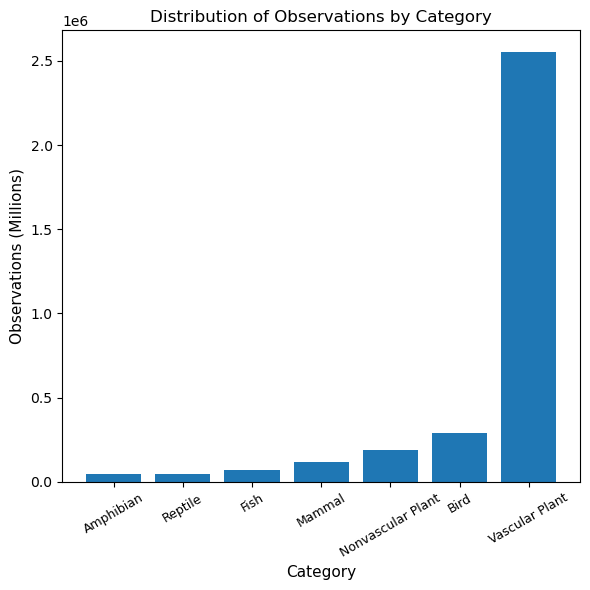

,park_name,most_observed_category,max_observation_count
0,Bryce National Park,Vascular Plant,442959.0
1,Great Smoky Mountains National Park,Vascular Plant,333177.0
2,Yellowstone National Park,Vascular Plant,1112190.0
3,Yosemite National Park,Vascular Plant,664965.0


<Figure size 640x480 with 0 Axes>

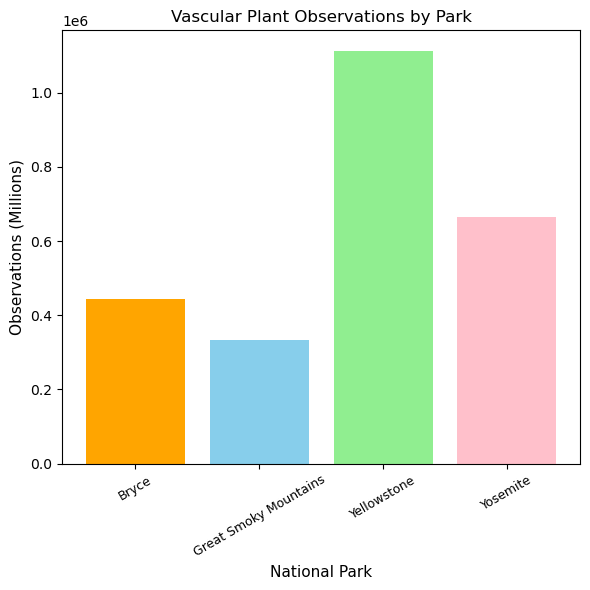

In [348]:
# To create a bar chart showing the total number of 'observations' per category
category_observations = all_data.groupby('category').observations.sum().reset_index()
category_observations = category_observations.sort_values(by='observations')

plt.figure(figsize=(6, 6))
plt.bar(range(len(category_observations)), category_observations.observations)
plt.title('Distribution of Observations by Category', size=12)
plt.xlabel('Category', size=11)
plt.ylabel('Observations (Millions)', size=11)
plt.xticks(ticks=range(len(category_observations)), labels=category_observations['category'], rotation=30, size=9)
plt.tight_layout()
plt.show()
plt.clf()

# Finding the category with the highest observation count for each park
total_observations = all_data.groupby(['park_name', 'category'])['observations'].sum().reset_index()
pivot = total_observations.pivot_table(index='park_name', columns='category', values='observations').reset_index()
pivot.set_index('park_name', inplace=True)
most_observed_category = pivot.idxmax(axis=1)
max_observation_count = pivot.max(axis=1)

# Summary table showing the category with the most observations for each park
result = pd.DataFrame({'most_observed_category': most_observed_category, 'max_observation_count': max_observation_count}).reset_index()
display(result)

# Bar chart comparing the total observations of `Vascular Plant` in each park
plt.figure(figsize=(6, 6))
plt.bar(range(len(result)), result.max_observation_count, color=colours)
plt.title('Vascular Plant Observations by Park', size=12)
plt.xlabel('National Park', size=11)
plt.ylabel('Observations (Millions)', size=11)
plt.xticks(ticks=range(len(result)), labels=parks, rotation=30, size=9)
plt.tight_layout()
plt.show()
plt.clf()

## 4. Conclusions

This analysis aimed to explore patterns in species protection and observation across different species groups and national parks.

Out of all species with a conservation status other than ‘No Intervention’, 84% were classified as ‘Species of Concern’. Among these, birds accounted for the largest number, followed by vascular plants and mammals. This suggests that conservation efforts might be most effective if focused on the many species falling under the ‘Species of Concern’ category, particularly birds.

Mammals and birds had the highest number of species under some form of protection. Combined, they make up 32% of all protected species. While this may indicate that these groups face higher conservation pressures, it could also reflect prioritisation in conservation policy or greater public and scientific attention towards these groups.

I compared conservation statuses across several species groups - mammals vs. birds, mammals vs. reptiles, and nonvascular vs. vascular plants. Among the pairs examined, only the difference between mammals and reptiles was statistically significant. This suggests mammals are more likely to receive protection than reptiles, and that this pattern is unlikely to be due to chance. The lack of a significant difference between mammals and birds aligns with their similar levels of protection, indicating that neither group is disproportionately prioritised over the other.

Finally, vascular plants had the most observations overall, as well as in each National Park. This number was significantly higher than other species groups, such as mammals and birds, indicating a strong presence or better detectability of plant species across the parks. A useful next step could be to test whether the difference in observation counts between vascular plants and other groups, such as mammals, is statistically significant. This would help to determine whether the observed difference is meaningful or more likely due to chance.

For further study, it would be valuable to look at observations at different times of the year. Species behaviour and seasonal variability are likely to have an impact on observations, therefore recording observations on a quarterly basis might provide some new insights into seasonal trends. Additionally, if data is available across multiple years, analysing changes in the species counts for each conservation status over time would offer a better understanding of the effectiveness of conservation efforts in the parks.